(snowball)=

# 18. Snowball Earth

```{note}
The Python scripts used below and some materials are modified from Prof. Brian E. J. Rose's climlab [website](https://brian-rose.github.io/ClimateLaboratoryBook/courseware/advanced-snowball-earth.html).
```

```{note}
You may need to run this script on your workstation.
```

climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (90, 1) 
The subprocess tree: 
Annual Mean EBM with ice line: <class 'climlab.model.ebm.EBM_annual'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      warm_albedo: <class 'climlab.surface.albedo.P2Albedo'>
      cold_albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
   SW: <class 'climlab.radiation.absorbed_shorwave.SimpleAbsorbedShortwave'>
   diffusion: <class 'climlab.dynamics.meridional_heat_diffusion.MeridionalHeatDiffusion'>

Integrating for 450 steps, 1826.2110000000002 days, or 5 years.
Total elapsed time is 5.000000000000044 years.


Integrating for 450 steps, 1826.2110000000002 days, or 5 years.
Total elapsed time is 5.000000000000044 years.
[-68.  68.]


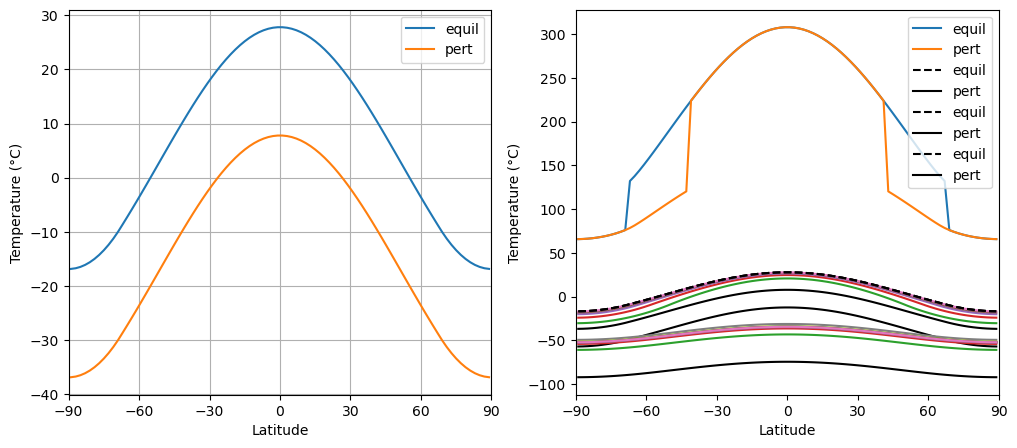

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from climlab import constants as const
import climlab

#  for convenience, set up a dictionary with our reference parameters
param = {'A':210, 'B':2, 'a0':0.3, 'a2':0.078, 'ai':0.62, 'Tf':-10., 'D':0.55}
model1 = climlab.EBM_annual(name='Annual Mean EBM with ice line', num_lat=90, **param )
print(model1)

model1.integrate_years(5)
Tequil = np.array(model1.Ts)
ALBequil = np.array(model1.albedo)
OLRequil = np.array(model1.OLR)
ASRequil = np.array(model1.ASR)

model1.Ts -= 20.
model1.compute_diagnostics()

my_ticks = [-90,-60,-30,0,30,60,90]
lat = model1.lat

fig = plt.figure( figsize=(12,5) )

ax1 = fig.add_subplot(1,2,1)
ax1.plot(lat, Tequil, label='equil')
ax1.plot(lat, model1.state['Ts'], label='pert' )
ax1.grid()
ax1.legend()
ax1.set_xlim(-90,90)
ax1.set_xticks(my_ticks)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Temperature (°C)')

ax2 = fig.add_subplot(1,2,2)
ax2.plot( lat, ASRequil, label='equil')
ax2.plot( lat, model1.diagnostics['ASR'], label='pert' )
ax2.grid()
ax2.legend()
ax2.set_xlim(-90,90)
ax2.set_xticks(my_ticks)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('ASR (W m$^{-2}$)')

climlab.global_mean( model1.ASR - ASRequil )


plt.plot( lat, Tequil, 'k--', label='equil' )
plt.plot( lat, model1.Ts, 'k-', label='pert' )
plt.grid(); plt.xlim(-90,90); plt.legend()
for n in range(5):
    model1.integrate_years(years=1.0, verbose=False)
    plt.plot(lat, model1.Ts)
plt.ylabel('Temperature (°C)')
plt.xlabel('Latitude')


model1.Ts -= 40.
model1.compute_diagnostics()


climlab.global_mean( model1.ASR - ASRequil )

plt.plot( lat, Tequil, 'k--', label='equil' )
plt.plot( lat, model1.Ts, 'k-', label='pert' )
plt.grid(); plt.xlim(-90,90); plt.legend()
for n in range(5):
    model1.integrate_years(years=1.0, verbose=False)
    plt.plot(lat, model1.Ts)
plt.ylabel('Temperature (°C)')
plt.xlabel('Latitude')


model1.Ts -= 40.
model1.compute_diagnostics()


climlab.global_mean( model1.ASR - ASRequil )

plt.plot( lat, Tequil, 'k--', label='equil' )
plt.plot( lat, model1.Ts, 'k-', label='pert' )
plt.grid(); plt.xlim(-90,90); plt.legend()
for n in range(5):
    model1.integrate_years(years=1.0, verbose=False)
    plt.plot(lat, model1.Ts)
plt.ylabel('Temperature (°C)')
plt.xlabel('Latitude')

model2 = climlab.EBM_annual(num_lat = 90, **param)
S0array = np.linspace(1400., 1200., 50)
model2.integrate_years(5)

print( model2.icelat)


In [2]:
icelat_cooling = np.empty_like(S0array)
icelat_warming = np.empty_like(S0array)

# First cool....
for n in range(S0array.size):
    model2.subprocess['insolation'].S0 = S0array[n]
    model2.integrate_years(10, verbose=False)
    icelat_cooling[n] = np.max(model2.icelat)
# Then warm...
for n in range(S0array.size):
    model2.subprocess['insolation'].S0 = np.flipud(S0array)[n]
    model2.integrate_years(10, verbose=False)
    icelat_warming[n] = np.max(model2.icelat)

model3 = climlab.EBM_annual(num_lat=90, **param)
S0array3 = np.linspace(1350., 1400., 50)
#S0array3 = np.linspace(1350., 1400., 5)
icelat3 = np.empty_like(S0array3)
for n in range(S0array3.size):
    model3.subprocess['insolation'].S0 = S0array3[n]
    model3.integrate_years(10, verbose=False)
    icelat3[n] = np.max(model3.icelat)

fig = plt.figure( figsize=(10,6) )
ax = fig.add_subplot(111)
ax.plot(S0array, icelat_cooling, 'r-', label='cooling' )
ax.plot(S0array, icelat_warming, 'b-', label='warming' )
ax.plot(S0array3, icelat3, 'g-', label='warming' )
ax.set_ylim(-10,100)
ax.set_yticks((0,15,30,45,60,75,90))
ax.grid()
ax.set_ylabel('Ice edge latitude', fontsize=16)
ax.set_xlabel('Solar constant (W m$^{-2}$)', fontsize=16)
ax.plot( [const.S0, const.S0], [-10, 100], 'k--', label='present-day' )
ax.legend(loc='upper left')
ax.set_title('Solar constant versus ice edge latitude in the EBM with albedo feedback', fontsize=16);


model4 = climlab.process_like(model2)  # initialize with cold Snowball temperature
model4.subprocess['insolation'].S0 = 1830.
model4.integrate_years(40)
plt.plot(model4.lat, model4.Ts)
plt.xlim(-90,90); plt.ylabel('Temperature (°C)'); plt.xlabel('Latitude')
plt.grid(); plt.xticks(my_ticks)
print('The ice edge is at ' + str(model4.icelat) + ' degrees latitude.' )

model4.subprocess['insolation'].S0 = 1840.
model4.integrate_years(10)
plt.plot(model4.lat, model4.Ts)
plt.xlim(-90,90); plt.ylabel('Temperature (°C)'); plt.xlabel('Latitude')
plt.grid(); plt.xticks(my_ticks);

print( model4.global_mean_temperature() )

S0array_snowballmelt = np.linspace(1400., 1900., 50)
icelat_snowballmelt = np.empty_like(S0array_snowballmelt)
icelat_snowballmelt_cooling = np.empty_like(S0array_snowballmelt)

for n in range(S0array_snowballmelt.size):
    model2.subprocess['insolation'].S0 = S0array_snowballmelt[n]
    model2.integrate_years(10, verbose=False)
    icelat_snowballmelt[n] = np.max(model2.icelat)

for n in range(S0array_snowballmelt.size):
    model2.subprocess['insolation'].S0 = np.flipud(S0array_snowballmelt)[n]
    model2.integrate_years(10, verbose=False)
    icelat_snowballmelt_cooling[n] = np.max(model2.icelat)


fig = plt.figure( figsize=(10,6) )
ax = fig.add_subplot(111)
ax.plot(S0array, icelat_cooling, 'r-', label='cooling' )
ax.plot(S0array, icelat_warming, 'b-', label='warming' )
ax.plot(S0array3, icelat3, 'g-', label='warming' )
ax.plot(S0array_snowballmelt, icelat_snowballmelt, 'b-' )
ax.plot(S0array_snowballmelt, icelat_snowballmelt_cooling, 'r-' )
ax.set_ylim(-10,100)
ax.set_yticks((0,15,30,45,60,75,90))
ax.grid()
ax.set_ylabel('Ice edge latitude', fontsize=16)
ax.set_xlabel('Solar constant (W m$^{-2}$)', fontsize=16)
ax.plot( [const.S0, const.S0], [-10, 100], 'k--', label='present-day' )
ax.legend(loc='upper left')
ax.set_title('Solar constant versus ice edge latitude in the EBM with albedo feedback', fontsize=16);


KeyboardInterrupt: 

## Hysteresis

```{figure} /_static/lecture_specific/lecture1_figures/ball_snow_tmp1.jpg
:scale: 40%
```